# Avacado Dataset

Avacado is a fruit which likely has its origination from South of Mexico. Its a fruit is which is consumed largely worldwide. There are many varieties of Avacado & according to the variety the skin is more or less rough and varies from fairly soft to practically shell-like. Also according to variety, it may green, brown, purplish, or black when ripe, and may be pear-shaped, egg-shaped, or spherical. Commercially, the fruit are ripened after harvesting.

Avocados are very nutritious and contain a wide variety of nutrients, including 20 different vitamins and minerals.

_"Here are some of the most abundant nutrients, in a single 3.5-ounce (100-gram) serving (3):

* Vitamin K: 26% of the daily value (DV)
* Folate: 20% of the DV
* Vitamin C: 17% of the DV
* Potassium: 14% of the DV
* Vitamin B5: 14% of the DV
* Vitamin B6: 13% of the DV
* Vitamin E: 10% of the DV
* It also contains small amounts of magnesium, manganese, copper, iron, zinc, phosphorous and vitamins A, B1 (thiamine), B2 (riboflavin) and B3 (niacin).
_All this data is collected from: https://www.healthline.com/nutrition/12-proven-benefits-of-avocado#TOC_TITLE_HDR_2 

Avacado helps in weight loss, acts as an anti-oxidant, helps in preventing cancer are some of the health benefits of eating Avacados.


# Content of this Dataset.

* *+ This particular dataset is colleced from Hass Avocado Board website in May of 2018 & compiled into a single CSV.

>* Description of the data is as mentioned below: 

> The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

* Date - The date of the observation
* AveragePrice - the average price of a single avocado
* type - conventional or organic
* year - the year
* Region - the city or region of the observation
* Total Volume - Total number of avocados sold
* 4046 - Total number of avocados with PLU 4046 sold
* 4225 - Total number of avocados with PLU 4225 sold
* 4770 - Total number of avocados with PLU 4770 sold

< We will work with this dataset & try to estimate the average price of Hass Avacado & also try to find the highest sale of avacado basis city or region.

# Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy
import warnings 
warnings.filterwarnings ('ignore')

Load the Dataset

In [2]:
adf = pd.read_csv('avacado.csv')

In [3]:
adf.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


*** Note: This original dataset has 2000 rows. Here we reduce it to 1500 rows. In the dataset, you may find blank values after 1510 rows. Hence, you may delete all blank rows in your CSV files explicitly. (This is the instruction already provided hence proceeding in dropping null values from the rows.

* The column Unnamed is only id column hence dropping the same from dataset too.

In [4]:
adf1=adf.dropna(axis = 0)
adf1

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,10.0,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016.0,Charlotte
1513,11.0,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016.0,Charlotte
1514,12.0,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016.0,Charlotte
1515,13.0,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016.0,Charlotte


In [5]:
adf2 = adf1.drop(['Unnamed: 0'],axis = 1)
adf2

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015.0,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015.0,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015.0,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015.0,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016.0,Charlotte
1513,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016.0,Charlotte
1514,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016.0,Charlotte
1515,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016.0,Charlotte


In [6]:
adf2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1516
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1517 non-null   object 
 1   AveragePrice  1517 non-null   float64
 2   Total Volume  1517 non-null   float64
 3   4046          1517 non-null   float64
 4   4225          1517 non-null   float64
 5   4770          1517 non-null   float64
 6   Total Bags    1517 non-null   float64
 7   Small Bags    1517 non-null   float64
 8   Large Bags    1517 non-null   float64
 9   XLarge Bags   1517 non-null   float64
 10  type          1517 non-null   object 
 11  year          1517 non-null   float64
 12  region        1517 non-null   object 
dtypes: float64(10), object(3)
memory usage: 165.9+ KB


In [7]:
adf2.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

Now there are no more null values in the dataset. Lets check other datapoints & analyze.

* Date & Year columns are object types, need to convert these to datetime format.

In [8]:
adf2['Date'] = pd.to_datetime(adf2['Date'])

In [9]:
adf2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1516
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          1517 non-null   datetime64[ns]
 1   AveragePrice  1517 non-null   float64       
 2   Total Volume  1517 non-null   float64       
 3   4046          1517 non-null   float64       
 4   4225          1517 non-null   float64       
 5   4770          1517 non-null   float64       
 6   Total Bags    1517 non-null   float64       
 7   Small Bags    1517 non-null   float64       
 8   Large Bags    1517 non-null   float64       
 9   XLarge Bags   1517 non-null   float64       
 10  type          1517 non-null   object        
 11  year          1517 non-null   float64       
 12  region        1517 non-null   object        
dtypes: datetime64[ns](1), float64(10), object(2)
memory usage: 165.9+ KB


Break the date format in year,month & day format for further analysis.

In [10]:
adf2['Year']= pd.DatetimeIndex(adf2['Date']).year
adf2['Month']= pd.DatetimeIndex(adf2['Date']).month
adf2['Weekday']= pd.DatetimeIndex(adf2['Date']).weekday
adf2

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Year,Month,Weekday
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015.0,Albany,2015,12,6
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015.0,Albany,2015,12,6
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015.0,Albany,2015,12,6
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015.0,Albany,2015,6,4
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015.0,Albany,2015,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,2016-10-16,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016.0,Charlotte,2016,10,6
1513,2016-09-10,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016.0,Charlotte,2016,9,5
1514,2016-02-10,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016.0,Charlotte,2016,2,2
1515,2016-09-25,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016.0,Charlotte,2016,9,6


In [11]:
adf2['type'].describe()

count             1517
unique               1
top       conventional
freq              1517
Name: type, dtype: object

In [12]:
adf2['type'].value_counts()

conventional    1517
Name: type, dtype: int64

** Splitting the date column has given us a duplicate year column which is a float type data, hence we can remove that from the dataset.
** The above code has confirmed type column is a unique column with only conventional type of data, hence removing that from the dataset too.

In [13]:
adf2.drop(['type','year'],inplace = True , axis=1)


In [14]:
adf2

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region,Year,Month,Weekday
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,Albany,2015,12,6
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,Albany,2015,12,6
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,Albany,2015,12,6
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,Albany,2015,6,4
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,Albany,2015,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,2016-10-16,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,Charlotte,2016,10,6
1513,2016-09-10,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,Charlotte,2016,9,5
1514,2016-02-10,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,Charlotte,2016,2,2
1515,2016-09-25,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,Charlotte,2016,9,6


<function matplotlib.pyplot.show(*args, **kw)>

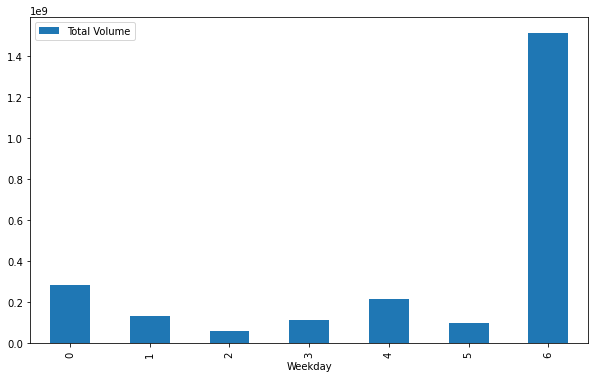

In [15]:
b =adf2.groupby('Weekday')['Total Volume',].sum()
b.plot(kind = 'bar',figsize = (10,6))
plt.show

* There is a trend in total volumes sold & weekday, we can clearly see sale is highest on Sunday.

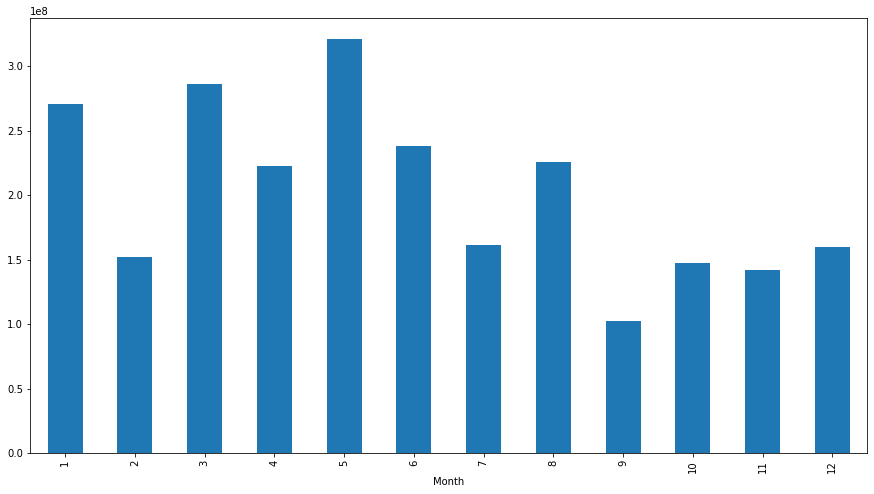

In [16]:
a=adf2.groupby('Month')['Total Volume'].sum()
a.plot(kind = 'bar', figsize = (15,8))

* There is an upward trend for sale of Avacado from january to May, MAy being highest then it starts declining.

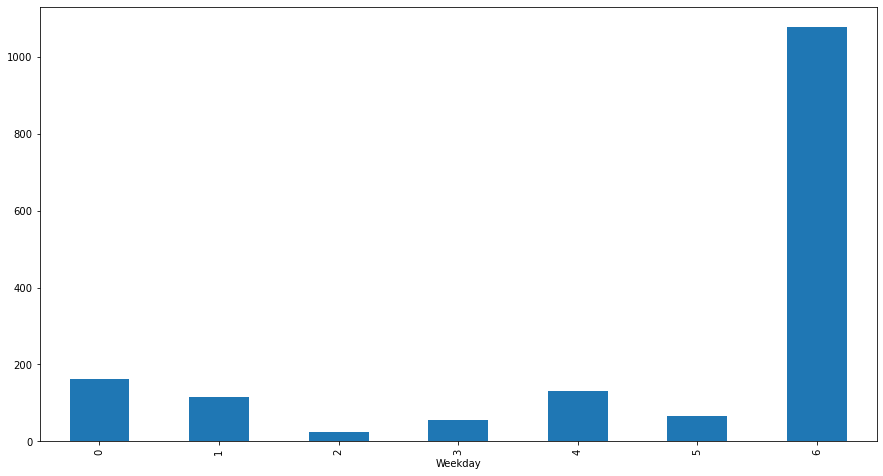

In [17]:
a=adf2.groupby('Weekday')['AveragePrice'].sum()
a.plot(kind = 'bar', figsize = (15,8))

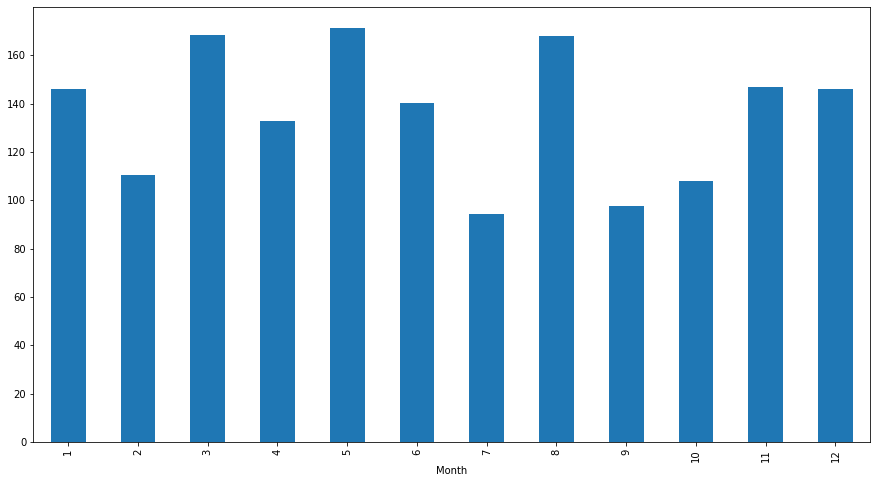

In [18]:
g=adf2.groupby('Month')['AveragePrice'].sum()
g.plot(kind = 'bar', figsize = (15,8))

In [19]:
r=adf2.groupby('region')['AveragePrice'].sum()

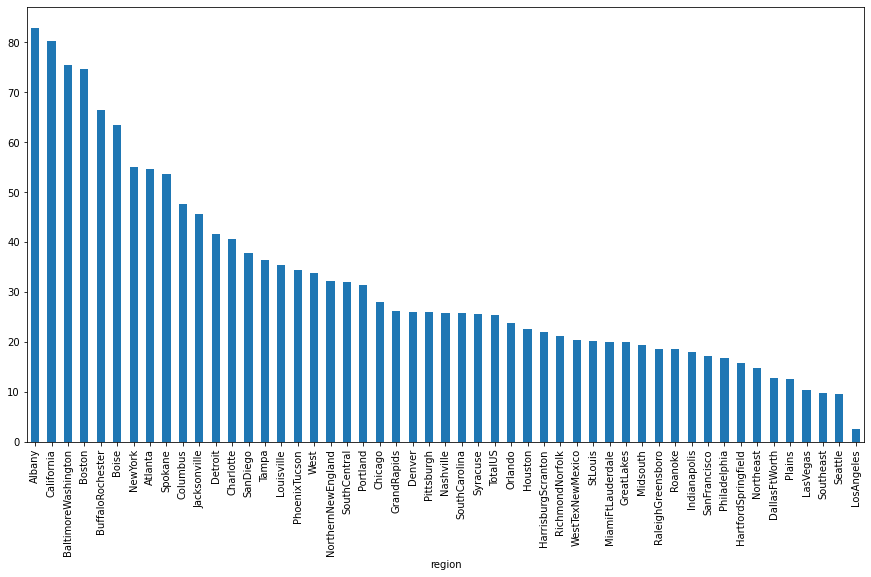

In [27]:
r.sort_values(ascending = False).plot(kind = 'bar', figsize = (15,8))

In [28]:
cor1 = adf2[['Total Bags','AveragePrice']]
cor1

,Total Bags,AveragePrice
0,8696.87,1.33
1,9505.56,1.35
2,8145.35,0.93
3,5811.16,1.08
4,6183.95,1.28
...,...,...
1512,59418.46,1.39
1513,63300.70,1.51
1514,62415.77,1.48
1515,63931.73,1.47


In [29]:
cor1.corr()

,Total Bags,AveragePrice
Total Bags,1.000000,-0.111597
AveragePrice,-0.111597,1.000000


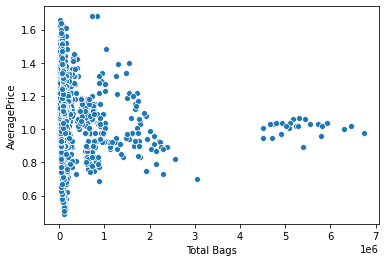

In [30]:
sns.scatterplot(data = adf2, x='Total Bags',y = 'AveragePrice')

* There is negative 11% correlation between Average Price & Total Bags & scatterplot shows no correlation between both points & presence of outliers are confirmed too in the scatter plot.

*The content of the data mentioned "The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags" There is also presence of Outliers in this dataset which we will check later stage and may consider to drop the column for better analysis.

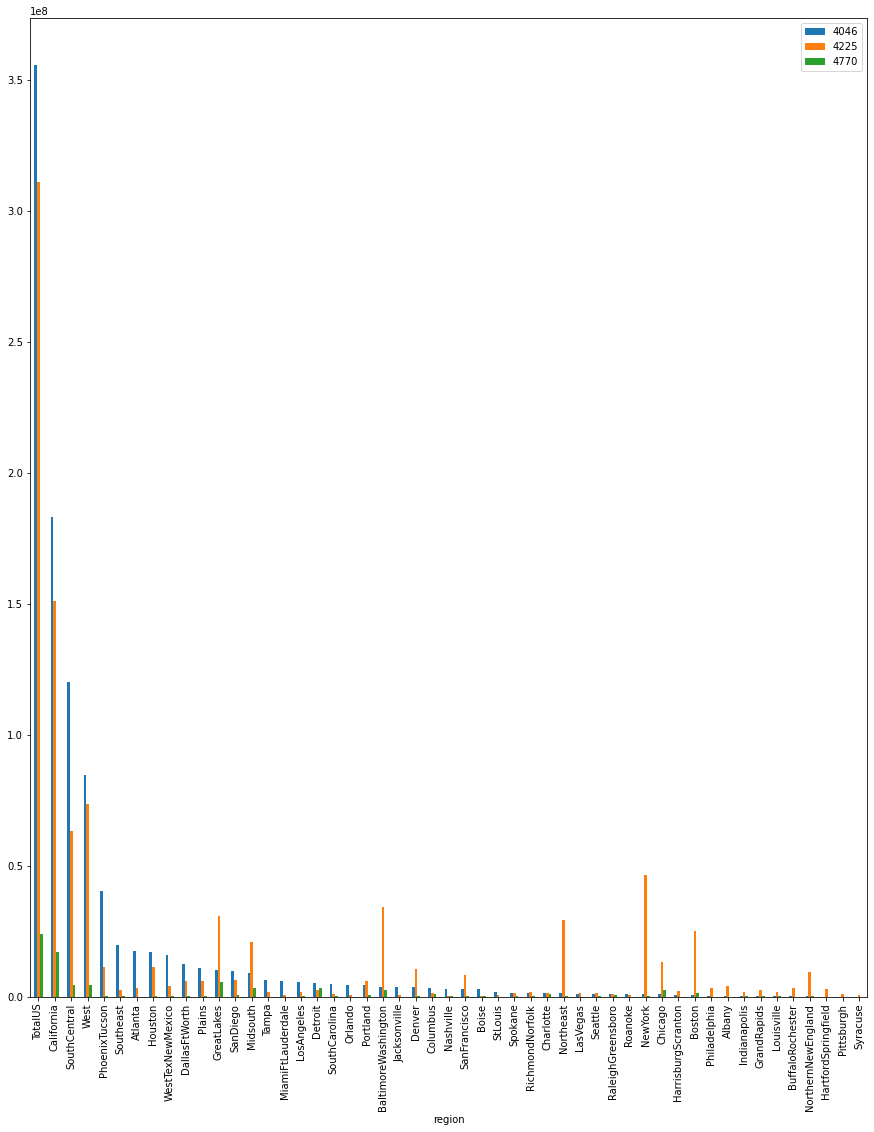

In [25]:
t=pd.pivot_table(adf2, index = 'region',values = ('4046','4225','4770'), aggfunc = 'sum').sort_values(by = '4046',ascending = False).plot(kind = 'bar',figsize = (15,18))


The bar graph above shows the distribution of products witn PLU 4046,PLU 4225 & PLU 4770 in different regions of Amrica.

* Total US has the highest seller of PLU 4046, followed by 4225 & then 4770.
* California is 2nd highest seller of PLU 4046 product followed by 4225 & the least is PLU 4770.
* SouthCentral has recorded 3rd highest sale of PLU 4046 followed by PLU 4225 & then PLU 4770,
* New York has reported a higher sales of PLU 4046, the other 2 are close to nil.
* Following New York, BaltimoreWashington & Northeast reported higher sales of PLU 4046 & the ration of sale of PLU 4225 & 4770 is very less.
* Great Lakes recorded highest sales of PLU 4225 followed by 4046 & then 4770.

This graph clearly shos us that the sals of PLU 4046 is higher than PLU 4225 & PLU 4770, & PLU 4770 is the least selling category of avacados regionwise. The sale of PLU 4225 is distributed among all the regions.


> Region column is an object column, will use label encoder for transforming the datatype.

In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [27]:
adf2['region']=le.fit_transform(adf2['region'])

In [28]:
adf2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1516
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          1517 non-null   datetime64[ns]
 1   AveragePrice  1517 non-null   float64       
 2   Total Volume  1517 non-null   float64       
 3   4046          1517 non-null   float64       
 4   4225          1517 non-null   float64       
 5   4770          1517 non-null   float64       
 6   Total Bags    1517 non-null   float64       
 7   Small Bags    1517 non-null   float64       
 8   Large Bags    1517 non-null   float64       
 9   XLarge Bags   1517 non-null   float64       
 10  region        1517 non-null   int32         
 11  Year          1517 non-null   int64         
 12  Month         1517 non-null   int64         
 13  Weekday       1517 non-null   int64         
dtypes: datetime64[ns](1), float64(9), int32(1), int64(3)
memory usage: 171.8 KB


In [72]:
adf2.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region,Year,Month,Weekday
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,21.196440,2015.162821,6.362558,4.667106
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,16.132398,0.369324,3.472146,2.131076
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,0.000000,2015.000000,1.000000,0.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,6.000000,2015.000000,3.000000,4.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,19.000000,2015.000000,6.000000,6.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,35.000000,2015.000000,9.000000,6.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,50.000000,2016.000000,12.000000,6.000000


***Observation:
* The mean of AveragePrice = 1.07, std = 0.19, min to max range = 0.49 to 1.68 & very less spread from 75th quartile. This confirms normally distribute datapoint wih no outliers.
* Mean of 4770 is 35330.334 with std deviation of 71187.963 & there is a huge gap between 75th quartile range & max value indicating presence of outliers.
* Large Bags Mean is 30294.461 & std = 68220.274 indicating a vastly spread data & there is a huge gap between 75th quartile & max values idicating outliers here.
* XLarge Bags mean = 1820.67 & std = 6707.327 & a huge difference between max 7 75th quartile values indicating skewness o data & presence of outliers.

AveragePrice        AxesSubplot(0.125,0.71587;0.133621x0.16413)
Total Volume     AxesSubplot(0.285345,0.71587;0.133621x0.16413)
4046              AxesSubplot(0.44569,0.71587;0.133621x0.16413)
4225             AxesSubplot(0.606034,0.71587;0.133621x0.16413)
4770             AxesSubplot(0.766379,0.71587;0.133621x0.16413)
Total Bags         AxesSubplot(0.125,0.518913;0.133621x0.16413)
Small Bags      AxesSubplot(0.285345,0.518913;0.133621x0.16413)
Large Bags       AxesSubplot(0.44569,0.518913;0.133621x0.16413)
XLarge Bags     AxesSubplot(0.606034,0.518913;0.133621x0.16413)
region          AxesSubplot(0.766379,0.518913;0.133621x0.16413)
Year               AxesSubplot(0.125,0.321957;0.133621x0.16413)
Month           AxesSubplot(0.285345,0.321957;0.133621x0.16413)
Weekday          AxesSubplot(0.44569,0.321957;0.133621x0.16413)
dtype: object

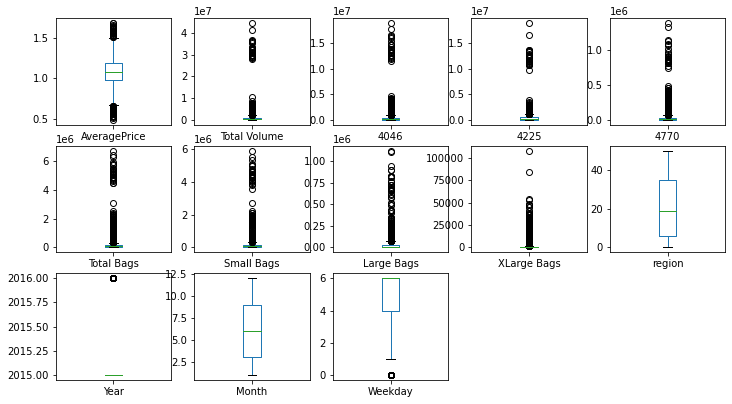

In [29]:
adf2.plot(kind='box',subplots=True,figsize = (12,9),layout=(4,5))

There are to many outliers in the dataset, we need to handle the removal of outliers before that lets check the pairplot & get some info.

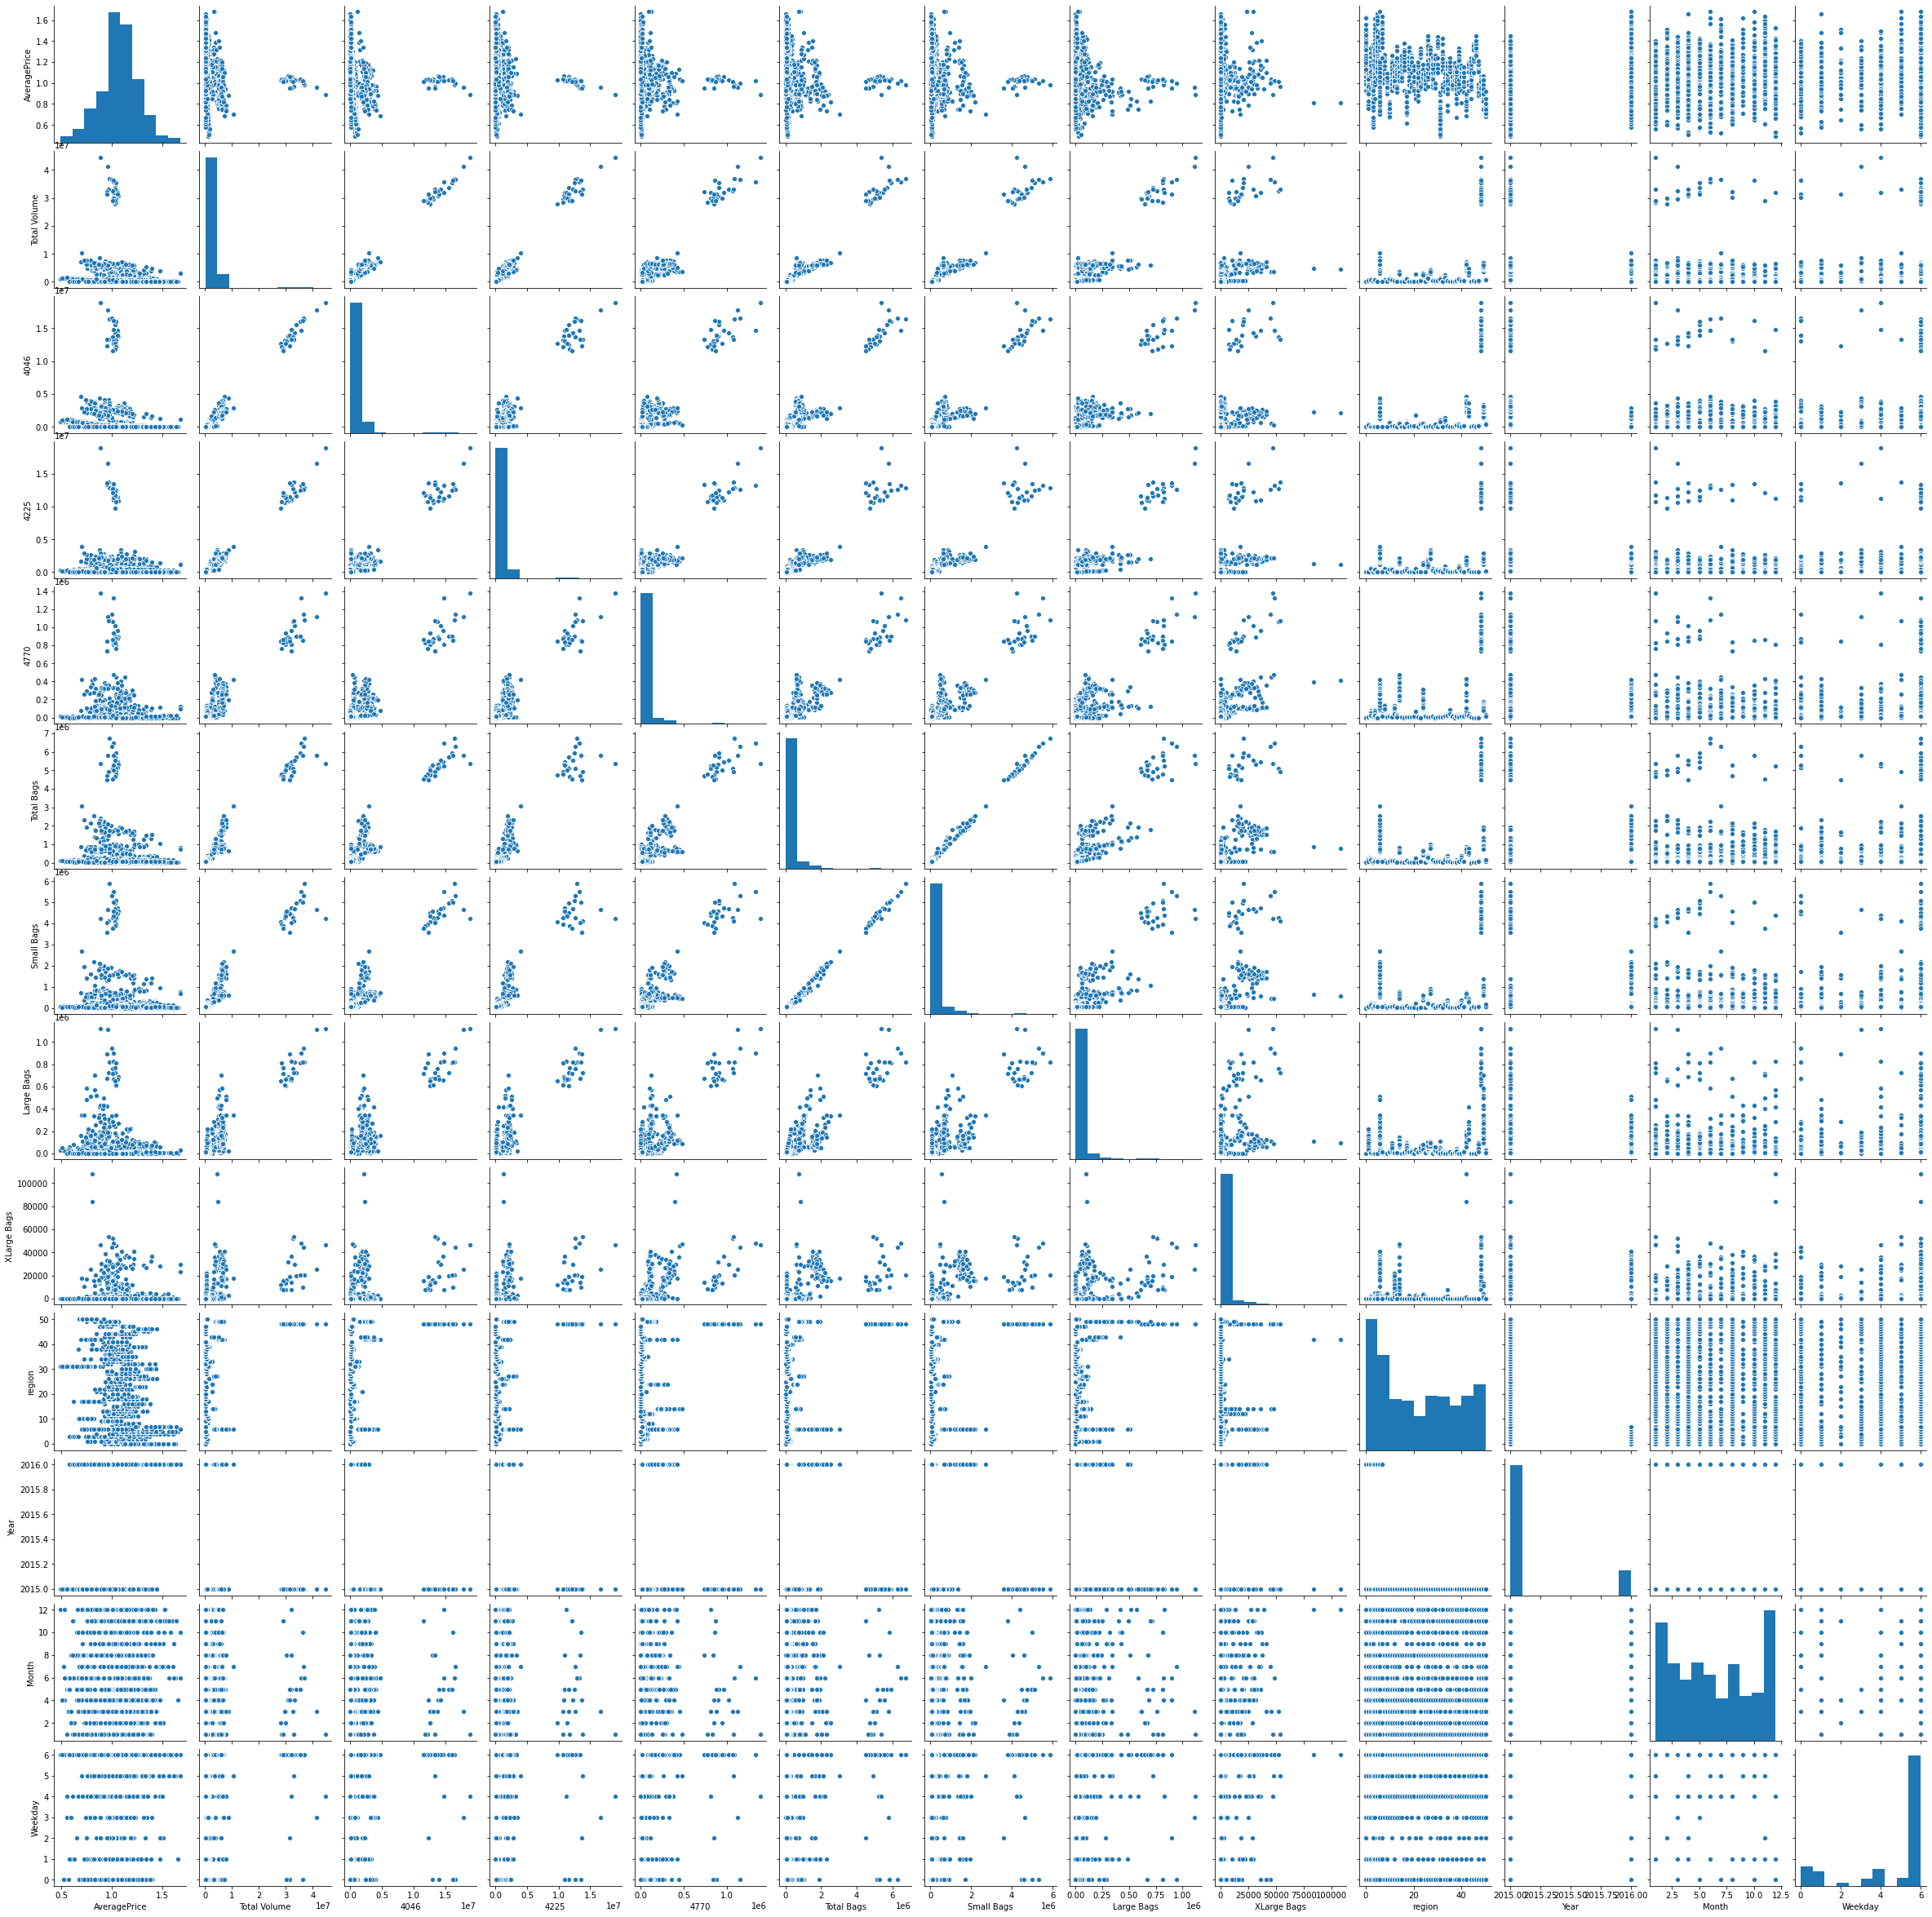

In [30]:
sns.pairplot(data=adf2)

* The pairplot shows a beautiful positive linearity between Total Volume with PLU 4046, PLU4225.
* Total Bags & Small Bags which has almost equal distribution with Total Volume.
* Total Bags & Small Bags shows a very high linearity in their spread which is prominantely visible above.

*** The dateset content had clearly mentioned that "The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags" Lets check the correlation of different size of bags & total bags with average Price & region & also check their skewness as we can see too many outliers in these columns.

In [31]:
#cor_a = adf2[['Total Bags','Small Bags','Large Bags','XLarge Bags','AveragePrice']]
#cor_a.corr()
#plt.figure(figsize =(15,11) )
#sns.heatmap(cor_a)

In [32]:
#cor_b = adf3[['Total Bags','Small Bags','Large Bags','XLarge Bags','region']]
#cor_b.corr()
#plt.figure(figsize=(18,15))
#sns.heatmap(cor_b,)

We cant see much correlation of Total Bags alongwith different sizes of bags columns, also these are all highly right side skewed datas & also some outliers are present in these columns hence dropping these column will be better than treating all things which may hamper % loss of datas.

In [33]:
#adf4=adf3.drop(['Total Bags','Small Bags','Large Bags','XLarge Bags'],axis = 1)
#adf4

# Removing Outliers

Dropping datetime datatypes for further evaluation of project.

In [34]:
adf3=adf2.drop(['Date','Year','Month','Weekday'],axis = 1)
adf3

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,0
...,...,...,...,...,...,...,...,...,...,...
1512,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,7
1513,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,7
1514,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,7
1515,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,7


CHECKING OUTLIERS USING ZSCORE

In [36]:
from scipy.stats import zscore
z=np.abs(zscore(adf3))
threshold = 3
print(np.where(z>3))

(array([ 398,  401,  409,  412,  412,  760, 1016, 1017, 1059, 1182, 1182,
       1182, 1182, 1182, 1182, 1182, 1182, 1183, 1183, 1183, 1183, 1183,
       1183, 1183, 1184, 1184, 1184, 1184, 1184, 1184, 1184, 1184, 1185,
       1185, 1185, 1185, 1185, 1185, 1185, 1186, 1186, 1186, 1186, 1186,
       1186, 1186, 1187, 1187, 1187, 1187, 1187, 1187, 1187, 1187, 1188,
       1188, 1188, 1188, 1188, 1188, 1188, 1189, 1189, 1189, 1189, 1189,
       1189, 1189, 1189, 1190, 1190, 1190, 1190, 1190, 1190, 1190, 1190,
       1191, 1191, 1191, 1191, 1191, 1191, 1191, 1191, 1192, 1192, 1192,
       1192, 1192, 1192, 1192, 1193, 1193, 1193, 1193, 1193, 1193, 1193,
       1194, 1194, 1194, 1194, 1194, 1194, 1194, 1195, 1195, 1195, 1195,
       1195, 1195, 1195, 1195, 1196, 1196, 1196, 1196, 1196, 1196, 1196,
       1197, 1197, 1197, 1197, 1197, 1197, 1197, 1198, 1198, 1198, 1198,
       1198, 1198, 1198, 1198, 1199, 1199, 1199, 1199, 1199, 1199, 1199,
       1200, 1200, 1200, 1200, 1200, 1200, 1200, 1

In [38]:
adf_zscore=adf3[(z<3).all(axis=1)]
adf_zscore.shape

(1436, 10)

CHECKING OUTLIERS USING IQR METHOD.

In [39]:
Q1 = adf3.quantile(0.25)
Q3 = adf3.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

AveragePrice         0.21
Total Volume    834505.09
4046            357178.14
4225            443674.28
4770             28256.05
Total Bags      121402.79
Small Bags      116472.13
Large Bags       28726.93
XLarge Bags        401.48
region              29.00
dtype: float64


In [40]:
adf_iqr=adf3[~((adf3 < (Q1 - 1.5 * IQR)) | (adf3 > (Q3 + 1.5 * IQR))).any(axis=1)]
adf_iqr.shape

(1010, 10)

In [42]:
adf3.shape

(1517, 10)

*** PERCENTAGE LOSS OF DATA WITH DIFFERENT OUTLIERS METHOD

In [44]:
percentage_loss = ((1517-1436)/1517)*100
print('Percentage loss using ZScore = ',percentage_loss)
print('\n')
percentageloss = ((1517-1010)/15117)*100
print("Percentage loss using IQR method = ",percentageloss)

Percentage loss using ZScore =  5.339485827290705


Percentage loss using IQR method =  3.353840047628498


In [46]:
adf_new=adf_iqr ### Saved the model post removal of outliers.

Lets check the correlation of the data

In [47]:
adf_corr=adf_new.corr()
adf_corr

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region
AveragePrice,1.000000,-0.393250,-0.641029,-0.034657,-0.061019,-0.045676,0.008918,-0.215893,-0.015845,-0.124639
Total Volume,-0.393250,1.000000,0.658276,0.797930,0.339178,0.784133,0.724726,0.436681,0.034300,0.013420
4046,-0.641029,0.658276,1.000000,0.086803,0.031635,0.231618,0.140046,0.405160,-0.006252,0.197096
4225,-0.034657,0.797930,0.086803,1.000000,0.358707,0.774982,0.766454,0.244564,0.028246,-0.136684
4770,-0.061019,0.339178,0.031635,0.358707,1.000000,0.389905,0.462395,-0.163527,0.040234,-0.088793
Total Bags,-0.045676,0.784133,0.231618,0.774982,0.389905,1.000000,0.969052,0.388968,0.112283,-0.071326
Small Bags,0.008918,0.724726,0.140046,0.766454,0.462395,0.969052,1.000000,0.149535,0.125844,-0.089428
Large Bags,-0.215893,0.436681,0.405160,0.244564,-0.163527,0.388968,0.149535,1.000000,-0.032244,0.048803
XLarge Bags,-0.015845,0.034300,-0.006252,0.028246,0.040234,0.112283,0.125844,-0.032244,1.000000,-0.074400
region,-0.124639,0.013420,0.197096,-0.136684,-0.088793,-0.071326,-0.089428,0.048803,-0.074400,1.000000


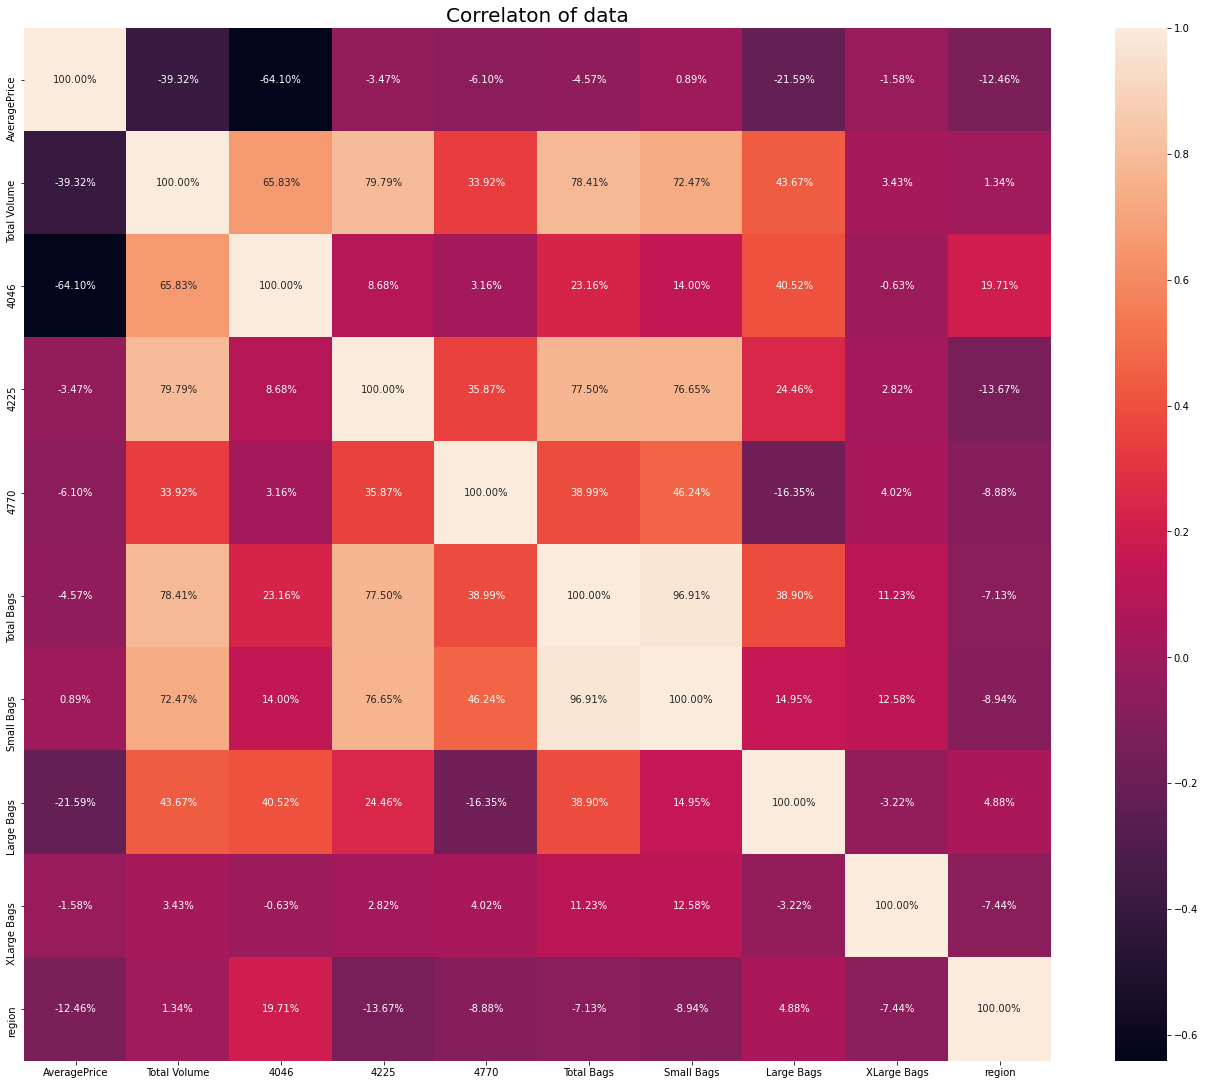

In [48]:
plt.figure(figsize=(23,19))
sns.heatmap(adf_corr,annot = True, fmt='.2%')
plt.title('Correlaton of data',fontsize = 20)
plt.show()

CORRELATIONS OF DATAPOINTS WITH AVERAGEPRICE:

* There is a high negative correlation between AveragePrce & 4046 @ -64.10.
* AveragePrice with Total Volume has a negative correlation of -39.32.
* PLU 4225 & PLU 4770 also has a -ve correlation with price @ -3.47 & -6.10.
* There is negative correlation of AveragePrice with Large Bags @ -21.59%, then Total bags at -4.57, then  XLarge Bags & a +ve relation with small bags @ 0.89%

*CORRELATIONS OF DATAPOINTS WITH REGION:

* There is a +ve correlation between product 4046 at 19.71% & -ve correlatons with 4225 at -13.67% & 4770% @ -8.88%
* The rest of the data have a correlation in between -13% to +5.

OTHER OBSERVATIONS:

* Total Bags with small bags have high correlation of 96.91% 

Lets check the skewness of the data.

In [49]:
adf_new.skew()

AveragePrice   -0.305263
Total Volume    1.155416
4046            1.930653
4225            1.830635
4770            2.052625
Total Bags      1.535451
Small Bags      1.610640
Large Bags      1.952104
XLarge Bags     3.444950
region          0.150077
dtype: float64

Datetime datatypes have been dropped fr analysing distplot.

In [54]:
columns = adf_new.columns
columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'region'],
      dtype='object')

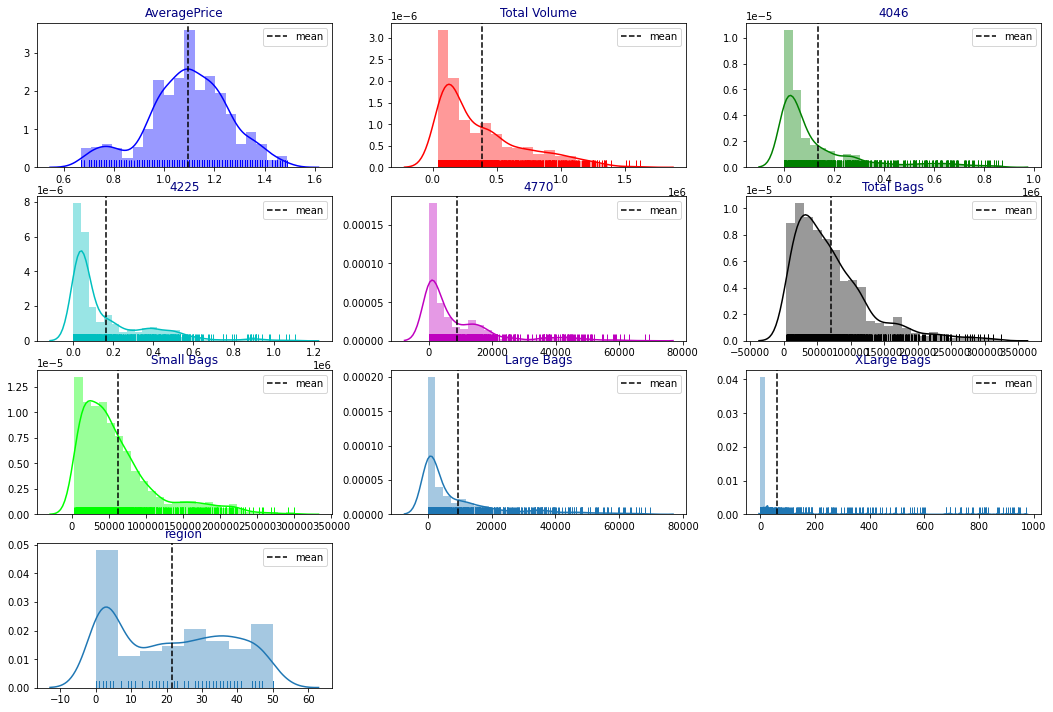

In [53]:
import itertools

cols  = (columns)
length = len(cols)
fig = plt.figure(figsize = (18,25))
cs=['b','r','g','c','m','k','lime']

for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(8,3,j+1)
    ax = sns.distplot(adf_new[i],color = k,rug = True)
    ax.set_facecolor('w')
    plt.axvline(adf_new[i].mean(),linestyle = 'dashed',label='mean',color='k')
    plt.legend(loc='best')
    plt.title(i,color='navy')
    plt.xlabel("")

* Average Price is normally distributed data.
* All the other datas have data skewed to th right.


# Preprocessing of data for modeling.

From the above analysis we can look at 2 parameters for selecting the target.
* 1st is choosing AveragePrice as target value 
* 2nd is to choose region as target variable, 

# Working with AveragePrice as target variable

****  Splitting | Scaling & treating Skewness of the data. 

In [64]:
from sklearn.preprocessing import StandardScaler


In [65]:
adf3

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,0
...,...,...,...,...,...,...,...,...,...,...
1512,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,7
1513,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,7
1514,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,7
1515,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,7


In [66]:
x=adf3.iloc[:,1:]
x

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region
0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,0
1,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,0
2,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,0
3,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,0
4,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,0
...,...,...,...,...,...,...,...,...,...
1512,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,7
1513,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,7
1514,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,7
1515,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,7


In [67]:
y=adf3.iloc[:,0]
y

0       1.33
1       1.35
2       0.93
3       1.08
4       1.28
        ... 
1512    1.39
1513    1.51
1514    1.48
1515    1.47
1516    1.43
Name: AveragePrice, Length: 1517, dtype: float64

****************************Standardization of Data & treating Skewness

In [68]:
sc=StandardScaler()
x=sc.fit_transform(x)

In [69]:
from sklearn.preprocessing import power_transform

In [70]:
x= power_transform(x,method = 'yeo-johnson')

# Modeling the data with AveragePrice as target variable

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [76]:
lrs = LinearRegression()
rfr=RandomForestRegressor()
svr=SVR()
ls= Lasso()
rg = Ridge()
enr = ElasticNet()

In [77]:
max_scr=0
for i in range(500,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.30)
    lrs.fit(x_train,y_train)
    pred_train=lrs.predict(x_train)
    pred_test=lrs.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,2)==round(r2_score(y_test,pred_test)*100,2):
        print('At random_state = ', i, 'the model is running well' )
        print('Training r2 score = ', r2_score(y_train,pred_train))
        print('Testing r2 score = ', r2_score(y_test,pred_test))

At random_state =  533 the model is running well
Training r2 score =  0.41618244070314014
Testing r2 score =  0.4161795202616264
At random_state =  815 the model is running well
Training r2 score =  0.4156984008392618
Testing r2 score =  0.4157180823133314


Random_state = 533 gave the best output so training & testing all the models based on this value.

In [84]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=533,test_size=0.30)

model = [lrs,rfr,ls,rg,enr,svr]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm = m.predict(x_test)
    print('R2 Score  of', m, 'is: ', r2_score(y_test,predm))
    print('Errors : ')
    print('Mean Absolute Error is ', mean_absolute_error(y_test,predm))
    print("Mean Squared Error is " , mean_squared_error(y_test,predm))
    print("Root Mean Squarerot Error is ", np.sqrt(mean_squared_error(y_test,predm)))
    print('\n')
    cross_val = cross_val_score(m,x,y,cv = 3)
    print('Cross Validation of ',m, 'is: ' )
    print('Mean CV of ',m, 'is: ',cross_val.mean(),'and','Std CV of ', 'm', 'is: ',cross_val.std())
    print('\n')

R2 Score  of LinearRegression() is:  0.4161795202616264
Errors : 
Mean Absolute Error is  0.10994800581716556
Mean Squared Error is  0.02095582979085841
Root Mean Squarerot Error is  0.1447612855388429


Cross Validation of  LinearRegression() is: 
Mean CV of  LinearRegression() is:  0.3566044555962864 and Std CV of  m is:  0.11210281795414703


R2 Score  of RandomForestRegressor() is:  0.7369513534032233
Errors : 
Mean Absolute Error is  0.06709144736842107
Mean Squared Error is  0.00944194809210527
Root Mean Squarerot Error is  0.0971696871051115


Cross Validation of  RandomForestRegressor() is: 
Mean CV of  RandomForestRegressor() is:  0.02085387492039385 and Std CV of  m is:  0.3895708490789795


R2 Score  of Lasso() is:  -0.004981076613546964
Errors : 
Mean Absolute Error is  0.1467356598376242
Mean Squared Error is  0.03607309629491723
Root Mean Squarerot Error is  0.18992918758031171


Cross Validation of  Lasso() is: 
Mean CV of  Lasso() is:  -0.008796381756158933 and Std CV o

The best model is RandomForestRegressor with scores as mentioned below:
* R2 Score  of RandomForestRegressor() is:  0.7369513534032233
*Errors : 
* Mean Absolute Error is  0.06709144736842107
* Mean Squared Error is  0.00944194809210527
* Root Mean Squarerot Error is  0.0971696871051115
* Mean CV of  RandomForestRegressor() is:  0.02085387492039385 and Std CV of  m is:  0.3895708490789795

# Hypertuning the best fit model

In [92]:
parameters = {'n_estimators':[100,200,500,700]}
clf = GridSearchCV(rfr,parameters,cv = 3)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'n_estimators': 200}


In [93]:
parameters = {'criterion':['mse','mae']}
clf = GridSearchCV(rfr,parameters,cv = 3)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'mae'}


In [94]:
parameters = {'max_depth':[10,20,30]}
clf = GridSearchCV(rfr,parameters,cv = 3)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'max_depth': 20}


In [95]:
parameters = {'min_samples_split':[2,3,5]}
clf = GridSearchCV(rfr,parameters,cv = 3)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'min_samples_split': 2}


In [96]:
parameters = {'min_samples_leaf':[1,2,3,5,7]}
clf = GridSearchCV(rfr,parameters,cv = 3)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'min_samples_leaf': 1}


In [100]:
parameters = {'max_features':['auto','sqrt','log2']}
clf = GridSearchCV(rfr,parameters,cv = 3)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'max_features': 'sqrt'}


In [101]:
parameters = {'bootstrap':[True,False]}
clf = GridSearchCV(rfr,parameters,cv = 3)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'bootstrap': True}


In [106]:
rfr=RandomForestRegressor(n_estimators= 200 ,max_depth = 20,criterion = 'mae',min_samples_split = 2,
                    min_samples_leaf = 1, max_features = 'sqrt',bootstrap = 'True' )
rfr.fit(x_train,y_train)
rfr.score(x_train,y_train)
pred_rfr=rfr.predict(x_test)
rfrrs = r2_score(y_test,pred_rfr)
rfrcscore = cross_val_score(rfr,x,y,cv = 3)
rfrm = rfrcscore.mean()

print('Cross Val Score = ', rfrcscore)
print('Mean of cross_val_score = ', rfrm*100)
print('R2 Score is - ',rfrrs*100)
print('\n')
print('Errors')
print('Mean Absolute Error is ', mean_absolute_error(y_test,pred_rfr))
print("Mean Squared Error is " , mean_squared_error(y_test,pred_rfr))
print("Root Mean Squarerot Error is ", np.sqrt(mean_squared_error(y_test,pred_rfr)))

Cross Val Score =  [-0.18862665  0.28325726  0.29017092]
Mean of cross_val_score =  12.826717583738558
R2 Score is -  77.23382169402701


Errors
Mean Absolute Error is  0.06368821271929823
Mean Squared Error is  0.008171761254111846
Root Mean Squarerot Error is  0.09039779452017535


# Serialization the data basis Averageprice as target variable

In [107]:
import joblib

In [108]:
joblib.dump(rfr,'avacado_averageprice_dataset.pkl')

['avacado_averageprice_dataset.pkl']

# Conclusion basis averaprice as target variable

In [111]:
a=np.array(y_test)
p = np.array(rfr.predict(x_test))
print(a)
print('\n')
print(p)

[1.18 1.08 1.22 0.81 0.98 1.06 0.89 0.83 1.06 0.92 0.95 0.88 1.04 1.12
 1.11 1.16 1.06 1.02 1.19 1.19 0.77 0.98 1.17 1.26 1.36 0.85 0.93 1.19
 1.08 1.36 1.33 0.9  1.17 0.95 0.56 1.18 1.17 0.95 1.12 1.24 1.28 1.06
 0.96 0.79 0.87 0.96 1.32 1.08 1.17 1.14 1.23 1.35 1.22 1.36 1.13 1.31
 1.14 1.22 1.12 1.1  0.97 0.97 0.96 1.1  1.18 1.03 1.22 1.52 1.04 0.96
 0.97 0.97 1.11 1.14 0.7  0.91 0.84 1.14 1.15 1.3  0.97 1.26 0.67 1.09
 0.83 1.08 1.04 1.   1.68 1.04 1.08 0.99 0.87 0.75 1.17 0.84 1.13 0.99
 1.12 1.1  1.23 1.08 1.18 0.99 0.79 1.15 1.45 1.27 1.33 1.19 1.16 1.12
 1.04 1.02 0.97 0.95 1.13 0.96 1.03 1.16 1.27 1.03 1.68 1.29 0.97 1.62
 1.16 1.19 1.41 0.9  1.62 1.17 0.52 1.29 1.08 1.11 0.86 0.76 0.96 1.18
 1.34 1.04 1.21 1.11 1.11 1.14 1.01 1.44 0.72 1.18 0.74 0.72 1.4  0.94
 1.23 1.16 0.93 0.9  1.21 0.95 0.99 0.96 1.03 1.17 1.06 1.53 0.76 1.34
 1.07 1.32 0.88 1.12 1.13 1.26 1.09 0.8  1.11 1.05 1.1  1.16 1.07 1.14
 0.85 1.07 0.83 0.93 0.99 0.7  1.11 1.16 1.12 1.15 0.87 1.09 0.85 1.39
 1.25 

In [112]:
adf1_df=pd.DataFrame({'Original': a, 'Predicted': p }, index = range (len(a)))
adf1_df

,Original,Predicted
0,1.18,1.181625
1,1.08,1.083375
2,1.22,1.101550
3,0.81,0.865900
4,0.98,1.031050
...,...,...
451,1.15,1.154175
452,1.15,1.039100
453,1.25,1.191700
454,1.06,1.029700


# Modeling the data with region as target variable

In [113]:
adf3

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,0
...,...,...,...,...,...,...,...,...,...,...
1512,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,7
1513,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,7
1514,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,7
1515,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,7


In [115]:
x1 = adf3.iloc[:,0:9]
x1

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00
...,...,...,...,...,...,...,...,...,...
1512,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28
1513,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00
1514,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00
1515,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00


In [117]:
y1 = adf3.iloc[:,-1]
y1

0       0
1       0
2       0
3       0
4       0
       ..
1512    7
1513    7
1514    7
1515    7
1516    7
Name: region, Length: 1517, dtype: int32

In [124]:
sc=StandardScaler()
x1=sc.fit_transform(x1)

In [125]:
x1= power_transform(x1,method = 'yeo-johnson')

In [120]:

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

In [121]:
lgr = LogisticRegression()
svc = SVC()
gnb = GaussianNB()
dtc = DecisionTreeClassifier()
knr = KNeighborsClassifier()

In [127]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size = .30, random_state = 533)

In [128]:
model = [lgr,svc,gnb,dtc,knr]


for m in model:
    m.fit(x1_train,y1_train)
    m.score(x1_train,y1_train)
    predm = m.predict(x1_test)
    print('Accuracy score of ', m, 'is: ' )
    print(accuracy_score(y1_test,predm))
    print(confusion_matrix(y1_test, predm))
    print(classification_report(y1_test,predm))
    print('\n')
    cross_val = cross_val_score(m,x1,y1,cv = 5)
    print('Cross Validation of ',m, 'is: ' )
    print('Mean CV of ',m, 'is: ',cross_val.mean(),'and','Std CV of ', 'm', 'is: ',cross_val.std())
    print('\n')
    print('\n')

Accuracy score of  LogisticRegression() is: 
0.7412280701754386
[[21  0  0 ...  0  0  0]
 [ 0 13  0 ...  0  0  0]
 [ 0  0 23 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  5  0]
 [ 0  0  0 ...  0  0  6]]
              precision    recall  f1-score   support

           0       0.55      0.88      0.68        24
           1       0.59      0.87      0.70        15
           2       0.88      0.96      0.92        24
           3       0.59      0.94      0.73        17
           4       0.82      0.82      0.82        17
           5       0.62      1.00      0.76        13
           6       0.66      0.95      0.78        22
           7       0.56      1.00      0.72         9
           8       0.86      1.00      0.92         6
           9       0.80      0.92      0.86        13
          10       1.00      0.50      0.67         4
          11       1.00      1.00      1.00         8
          12       0.94      1.00      0.97        16
          13       1.00

Cross Validation of  GaussianNB() is: 
Mean CV of  GaussianNB() is:  0.8299895779051589 and Std CV of  m is:  0.06010576698403841




Accuracy score of  DecisionTreeClassifier() is: 
0.8706140350877193
[[22  0  0 ...  0  0  0]
 [ 0 11  0 ...  0  0  0]
 [ 0  0 21 ...  0  0  0]
 ...
 [ 0  0  0 ...  9  0  0]
 [ 0  0  0 ...  0  4  0]
 [ 0  0  0 ...  0  0  9]]
              precision    recall  f1-score   support

           0       0.96      0.92      0.94        24
           1       0.58      0.73      0.65        15
           2       1.00      0.88      0.93        24
           3       1.00      1.00      1.00        17
           4       0.89      1.00      0.94        17
           5       0.93      1.00      0.96        13
           6       1.00      0.77      0.87        22
           7       0.78      0.78      0.78         9
           8       0.86      1.00      0.92         6
           9       0.75      0.92      0.83        13
          10       1.00      0.75      0.86    

BEST ACCURACY SCORES

* GaussianNB has a good accuracy @ 88% score wth best CV score of 83%

>* Accuracy score of  GaussianNB() is: 0.8793859649122807
Mean CV of  GaussianNB() is:  0.8299895779051589 and Std CV of  m is:  0.06010576698403841

* KNeighboursClassifier has best accuracy score of arounf 88.60% & Cv score of 81.81%
* Accuracy score of  KNeighborsClassifier() is: 0.8859649122807017
Mean CV of  KNeighborsClassifier() is:  0.818069306930693 and Std CV of  m is:  0.019771133426519826

** Will Hypertune both the model & save the best fit model.

# Hypertuning the model

In [131]:
parameters = {'var_smoothing': np.logspace(0,-9, num=100)}
clf = GridSearchCV(gnb,parameters,cv = 5)
clf.fit(x1_train,y1_train)
print(clf.best_params_)

{'var_smoothing': 0.0006579332246575676}


In [135]:
gnb = GaussianNB(var_smoothing = 0.0006579332246575676)
gnb.fit(x1_train,y1_train)
gnb.score(x1_train,y1_train)
pred_gnb=gnb.predict(x1_test)
print('Accuracy Score = ',accuracy_score(y1_test,pred_gnb))
print(confusion_matrix(y1_test, pred_gnb))
print(classification_report(y1_test,pred_gnb))
cross_val = cross_val_score(gnb,x1,y1,cv = 5)
print('Cross Validation of ',gnb, 'is: ' )
print('Mean CV of ',gnb, 'is: ',cross_val.mean(),'and','Std CV of ', gnb, 'is: ',cross_val.std())

Accuracy Score =  0.918859649122807
[[23  0  0 ...  0  0  0]
 [ 0 11  0 ...  0  0  0]
 [ 0  0 24 ...  0  0  0]
 ...
 [ 0  0  0 ...  9  0  0]
 [ 0  0  0 ...  0  5  0]
 [ 0  0  0 ...  0  0  8]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        24
           1       0.79      0.73      0.76        15
           2       0.96      1.00      0.98        24
           3       1.00      0.94      0.97        17
           4       1.00      0.88      0.94        17
           5       0.87      1.00      0.93        13
           6       0.96      1.00      0.98        22
           7       1.00      0.78      0.88         9
           8       1.00      1.00      1.00         6
           9       1.00      1.00      1.00        13
          10       1.00      1.00      1.00         4
          11       0.80      1.00      0.89         8
          12       1.00      0.94      0.97        16
          13       1.00      1.00      1.00        

The accuracy score of GNB has improved drastically by hyper tuning. Lets check for Kneighborsclassifier.

In [138]:
parameters = {'n_neighbors': [5,50],'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'weights':['uniform','distance'],}
clf = GridSearchCV(knr,parameters)
clf.fit(x1_train,y1_train)
print(clf.best_params_)

{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'distance'}


In [140]:
knr = KNeighborsClassifier(algorithm = 'auto',n_neighbors = 5,weights = 'distance')
knr.fit(x1_train,y1_train)
knr.score(x1_train,y1_train)
pred_knr=knr.predict(x1_test)
print('Accuracy Score = ',accuracy_score(y1_test,pred_knr))
print(confusion_matrix(y1_test, pred_knr))
print(classification_report(y1_test,pred_knr))

Accuracy Score =  0.9035087719298246
[[23  0  0 ...  0  0  0]
 [ 0 14  0 ...  0  0  0]
 [ 0  0 24 ...  0  0  0]
 ...
 [ 0  0  0 ...  8  0  0]
 [ 0  0  0 ...  0  6  0]
 [ 0  0  0 ...  0  0  8]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        24
           1       1.00      0.93      0.97        15
           2       0.96      1.00      0.98        24
           3       1.00      1.00      1.00        17
           4       1.00      0.88      0.94        17
           5       0.82      0.69      0.75        13
           6       0.95      0.86      0.90        22
           7       1.00      1.00      1.00         9
           8       1.00      1.00      1.00         6
           9       0.80      0.92      0.86        13
          10       1.00      1.00      1.00         4
          11       1.00      0.88      0.93         8
          12       0.94      1.00      0.97        16
          13       1.00      0.38      0.55       

# Serialization based on region as target variable.

Accuracy Score is better with GAussianNB model hence saving that model.

In [141]:
joblib.dump(gnb,'avacado_region_dataset.pkl')

['avacado_region_dataset.pkl']

In [142]:
a=np.array(y_test)
p = np.array(gnb.predict(x_test))
print(a)
print('\n')
print(p)
adf_2=pd.DataFrame({'Original': a, 'Predicted': p }, index = range (len(a)))
adf_2

[1.18 1.08 1.22 0.81 0.98 1.06 0.89 0.83 1.06 0.92 0.95 0.88 1.04 1.12
 1.11 1.16 1.06 1.02 1.19 1.19 0.77 0.98 1.17 1.26 1.36 0.85 0.93 1.19
 1.08 1.36 1.33 0.9  1.17 0.95 0.56 1.18 1.17 0.95 1.12 1.24 1.28 1.06
 0.96 0.79 0.87 0.96 1.32 1.08 1.17 1.14 1.23 1.35 1.22 1.36 1.13 1.31
 1.14 1.22 1.12 1.1  0.97 0.97 0.96 1.1  1.18 1.03 1.22 1.52 1.04 0.96
 0.97 0.97 1.11 1.14 0.7  0.91 0.84 1.14 1.15 1.3  0.97 1.26 0.67 1.09
 0.83 1.08 1.04 1.   1.68 1.04 1.08 0.99 0.87 0.75 1.17 0.84 1.13 0.99
 1.12 1.1  1.23 1.08 1.18 0.99 0.79 1.15 1.45 1.27 1.33 1.19 1.16 1.12
 1.04 1.02 0.97 0.95 1.13 0.96 1.03 1.16 1.27 1.03 1.68 1.29 0.97 1.62
 1.16 1.19 1.41 0.9  1.62 1.17 0.52 1.29 1.08 1.11 0.86 0.76 0.96 1.18
 1.34 1.04 1.21 1.11 1.11 1.14 1.01 1.44 0.72 1.18 0.74 0.72 1.4  0.94
 1.23 1.16 0.93 0.9  1.21 0.95 0.99 0.96 1.03 1.17 1.06 1.53 0.76 1.34
 1.07 1.32 0.88 1.12 1.13 1.26 1.09 0.8  1.11 1.05 1.1  1.16 1.07 1.14
 0.85 1.07 0.83 0.93 0.99 0.7  1.11 1.16 1.12 1.15 0.87 1.09 0.85 1.39
 1.25 

,Original,Predicted
0,1.18,34
1,1.08,34
2,1.22,34
3,0.81,24
4,0.98,34
...,...,...
451,1.15,34
452,1.15,11
453,1.25,11
454,1.06,1
